# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df['sex'].replace({0: 'feminino', 1: 'masculino'}, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_grupos
0,63.0,masculino,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,59 a 69 anos
1,67.0,masculino,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,59 a 69 anos
2,67.0,masculino,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,59 a 69 anos
3,37.0,masculino,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,29 a 39 anos
4,41.0,feminino,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,39 a 49 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,masculino,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,39 a 49 anos
299,68.0,masculino,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,59 a 69 anos
300,57.0,masculino,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,49 a 59 anos
301,57.0,feminino,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,49 a 59 anos


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [13]:
biv = pd.crosstab(df['sex'], df['flag_doente'], margins = True).rename(columns = {0:'Saudáveis', 1:'Doentes', 'All':'Total'})
biv

flag_doente,Saudáveis,Doentes,Total
sex,,,
feminino,72,25,97
masculino,92,114,206
All,164,139,303


In [14]:
biv['Média de doentes'] = biv['Doentes'][0] + biv['Doentes'][1] / 2
biv['Odds'] = biv['Doentes']/biv['Saudáveis']
biv['Odds Ratio'] = biv['Doentes'][2] / biv['Saudáveis'][2]
biv['Logito'] = np.log(biv['Odds'])
biv['WOE'] = np.log(biv['Odds Ratio'][2:])

biv


C:\Users\milla\AppData\Local\Temp\ipykernel_12108\137258058.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  biv['Média de doentes'] = biv['Doentes'][0] + biv['Doentes'][1] / 2
C:\Users\milla\AppData\Local\Temp\ipykernel_12108\137258058.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  biv['Odds Ratio'] = biv['Doentes'][2] / biv['Saudáveis'][2]


flag_doente,Saudáveis,Doentes,Total,Média de doentes,Odds,Odds Ratio,Logito,WOE
sex,,,,,,,,
feminino,72,25,97,82.0,0.347222,0.847561,-1.057790,NaN
masculino,92,114,206,82.0,1.239130,0.847561,0.214410,NaN
All,164,139,303,82.0,0.847561,0.847561,-0.165392,-0.165392


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [15]:
print(df.age.min())
print(df.age.max())


29.0
77.0


In [16]:
df['age_grupos'] = pd.cut(df['age'], bins=[29, 39, 49, 59, 69, 77], labels=['29 a 39 anos','39 a 49 anos','49 a 59 anos','59 a 69 anos','69 a 77 anos'],
                         right=False)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_grupos
0,63.0,masculino,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,59 a 69 anos
1,67.0,masculino,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,59 a 69 anos
2,67.0,masculino,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,59 a 69 anos
3,37.0,masculino,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,29 a 39 anos
4,41.0,feminino,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,39 a 49 anos


In [19]:
age_grupos = pd.crosstab(df['age_grupos'], df['flag_doente'], margins=True).rename(columns = {0:'Saudáveis', 1:'Doentes', 'All':'Total'})

age_grupos['Média de doentes'] = age_grupos['Doentes'][0] + age_grupos['Doentes'][1] / 2
age_grupos['Odds'] = age_grupos['Doentes']/age_grupos['Saudáveis']
age_grupos['Odds Ratio'] = age_grupos['Doentes'][2] / age_grupos['Saudáveis'][2]
age_grupos['Logito'] = np.log(age_grupos['Odds'])
age_grupos['WOE'] = np.log(age_grupos['Odds Ratio'][2:])

age_grupos

C:\Users\milla\AppData\Local\Temp\ipykernel_12108\3092725958.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_grupos['Média de doentes'] = age_grupos['Doentes'][0] + age_grupos['Doentes'][1] / 2
C:\Users\milla\AppData\Local\Temp\ipykernel_12108\3092725958.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_grupos['Odds Ratio'] = age_grupos['Doentes'][2] / age_grupos['Saudáveis'][2]


flag_doente,Saudáveis,Doentes,Total,Média de doentes,Odds,Odds Ratio,Logito,WOE
age_grupos,,,,,,,,
29 a 39 anos,8,3,11,13.5,0.375000,0.84127,-0.980829,NaN
39 a 49 anos,50,21,71,13.5,0.420000,0.84127,-0.867501,NaN
49 a 59 anos,63,53,116,13.5,0.841270,0.84127,-0.172843,-0.172843
59 a 69 anos,35,57,92,13.5,1.628571,0.84127,0.487703,-0.172843
69 a 77 anos,8,4,12,13.5,0.500000,0.84127,-0.693147,-0.172843
All,164,138,302,13.5,0.841463,0.84127,-0.172613,-0.172843


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

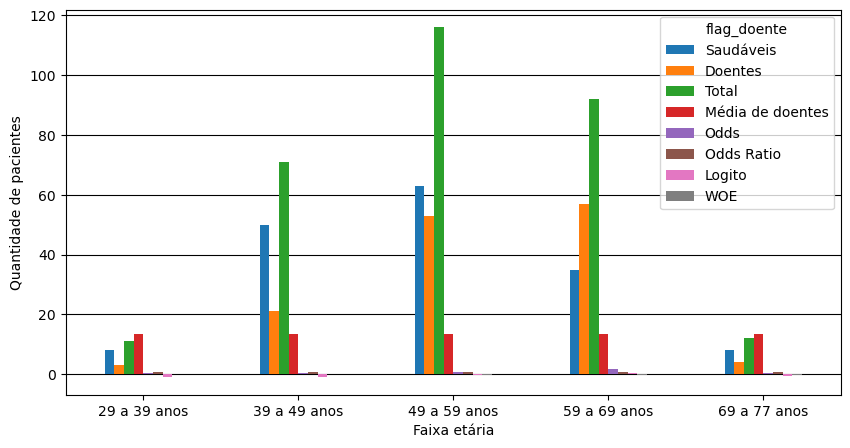

In [22]:
(age_grupos.drop('All').plot.bar(rot=0, figsize=(10, 5), zorder=2).grid(zorder=1, color='black', axis='y'))
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de pacientes')
plt.title('Distribuição de pacientes por faixa etária')
plt.show()